# Creacion del modelo

In [90]:
# importamos las librerias necesarias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
#Se leen los datos una vez limpiados
#Por favor cambiar la ruta por la ruta absoluta correspondiente a su equipo, gracias. 
path = 'C:/Users/USER/Desktop/Analitica/analiticaComputacionalProyecto1/data/cleanData.csv'
data = pd.read_csv(path,index_col=0)
#Revisamos el tamaño de los datos y su resumen
print(data.shape)
data.head()

(1197, 16)


,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarterEncoded,dayEncoded,productivity_indicator
date,,,,,,,,,,,,,,,,
1/1/2015,Quarter1,1,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,0,3,0.140725
1/1/2015,Quarter1,0,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,0,3,0.136500
1/1/2015,Quarter1,1,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,0,3,0.000570
1/1/2015,Quarter1,1,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,0,3,0.000570
1/1/2015,Quarter1,1,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,0,3,0.000382


In [92]:
#COMPORTAMIENTO DE LAS VARIABLES
data.describe()

,department,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarterEncoded,dayEncoded,productivity_indicator
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.577277,6.426901,0.729632,15.062172,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091,1.399332,2.487051,0.005459
std,0.494199,3.463963,0.097891,10.943219,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488,1.215535,1.707511,0.160082
min,0.000000,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705,0.000000,0.000000,-0.561958
25%,0.000000,3.000000,0.700000,3.940000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307,0.000000,1.000000,-0.009556
50%,1.000000,6.000000,0.750000,15.260000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333,1.000000,2.000000,0.000505
75%,1.000000,9.000000,0.800000,24.260000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253,2.000000,4.000000,0.099111
max,1.000000,12.000000,0.800000,54.560000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437,4.000000,5.000000,0.644375


In [93]:
#Creacion del modelo: Explicacion de por qué se escoge un modelo de regresion
#ToDo

## Creacion del modelo Lineal

In [94]:
#se intenta mediante sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [95]:
# Eleccion de variables de interes
features = ['dayEncoded','quarterEncoded','department','over_time','incentive','no_of_workers']
x = data[features]
x = x.reset_index(drop=True)
print(data.shape)
x.head()

(1197, 16)


,dayEncoded,quarterEncoded,department,over_time,incentive,no_of_workers
0,3,0,1,7080,98,59.0
1,3,0,0,960,0,8.0
2,3,0,1,3660,50,30.5
3,3,0,1,3660,50,30.5
4,3,0,1,1920,50,56.0


### Definimos la variable de respuesta

In [96]:
y = data['productivity_indicator']
y = y.reset_index(drop=True)
print(y.shape)
y.head()

(1197,)


0    0.940725
1    0.886500
2    0.800570
3    0.800570
4    0.800382
Name: actual_productivity, dtype: float64

In [97]:
#Normaliza con minmax
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [98]:
#Separacion entre datos de train y test

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)

# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(957, 6)
(957,)
(240, 6)
(240,)


In [99]:
#Utilizando statsmodel
import statsmodels.api as sm
# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

# imprimir coeficientes
intercept=linreg.intercept_
# coeficientes con nombre de las características
coef = list(zip(features, linreg.coef_))
# agregar constante explícitamente
X_train = sm.add_constant(X_train)
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model1 = sm.OLS(y_train, X_train).fit()
print(model1.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.024
Model:                             OLS   Adj. R-squared:                  0.017
Method:                  Least Squares   F-statistic:                     3.820
Date:                 Tue, 12 Mar 2024   Prob (F-statistic):           0.000905
Time:                         14:01:49   Log-Likelihood:                 331.10
No. Observations:                  957   AIC:                            -648.2
Df Residuals:                      950   BIC:                            -614.2
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7506      0.0

#### Como se puede apreciar el modelo no es muy bueno prediciendo $r^{2}$ = 0.01, vamos a eliminar las variables menos significativas para ajustar el modelo

In [100]:
features.remove('quarterEncoded')
features.remove('dayEncoded')
x = data[features]
x = x.reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
intercept=linreg.intercept_
coef = list(zip(features, linreg.coef_))
# agregar constante explícitamente
X_train = sm.add_constant(X_train)
# regresión numero 2 usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model2 = sm.OLS(y_train, X_train).fit()
print(model2.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.019
Model:                             OLS   Adj. R-squared:                  0.015
Method:                  Least Squares   F-statistic:                     4.717
Date:                 Tue, 12 Mar 2024   Prob (F-statistic):           0.000899
Time:                         14:01:49   Log-Likelihood:                 329.09
No. Observations:                  957   AIC:                            -648.2
Df Residuals:                      952   BIC:                            -623.9
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7332      0.012 

### Usamos el modelo para predecir los datos de validacion

In [101]:
y_pred = linreg.predict(X_test)
y_pred

array([0.74645141, 0.7334585 , 0.72151192, 0.74449716, 0.75525937,
       0.74791941, 0.74449716, 0.72738923, 0.76016807, 0.74645141,
       0.74791941, 0.74206589, 0.740313  , 0.74498342, 0.74731159,
       0.74498342, 0.72545181, 0.72482183, 0.69969465, 0.74255215,
       0.74498342, 0.74401091, 0.72733181, 0.74498342, 0.70172811,
       0.70573792, 0.74791941, 0.74498342, 0.69969465, 0.74449716,
       0.75085539, 0.71748186, 0.76993931, 0.72741838, 0.73803956,
       0.74498342, 0.73853083, 0.72380673, 0.71192643, 0.73069754,
       0.72586308, 0.74381488, 0.73639449, 0.74498342, 0.73145925,
       0.9497237 , 0.738845  , 0.69278306, 0.69575904, 0.74645141,
       0.75966335, 0.72628982, 0.73314432, 0.73373268, 0.75525937,
       0.72887906, 0.7101419 , 0.69481365, 0.74498342, 0.74255215,
       0.75085539, 0.74449716, 0.73665049, 0.71747428, 0.74376778,
       0.74401091, 0.69969465, 0.75012601, 0.73882411, 0.71454588,
       0.72821177, 0.72769704, 0.74791941, 0.73094233, 0.73639

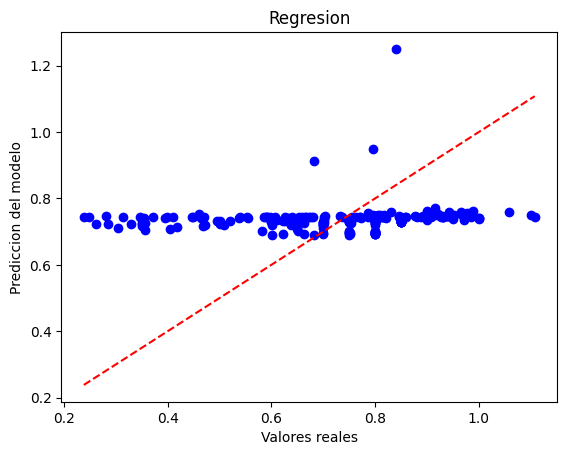

In [102]:
# Hacer predicciones en el conjunto de prueba
y_pred = linreg.predict(X_test)

# Graficar las predicciones vs los valores reales
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')  # Línea de referencia y=x
plt.xlabel('Valores reales')
plt.ylabel('Prediccion del modelo')
plt.title('Regresion')
plt.show()

### Evaluamos las métricas del modelo

In [103]:
#Importacion de clases para las métricas de evaluacion
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [104]:
# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

# Calcular el coeficiente de determinación (R²)
r2 = metrics.r2_score(y_test, y_pred)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  0.14117057713876538
MSE:  0.03178544064986869
RMSE:  0.17828471793698047


### Metricas con validacion cruzada

In [105]:
#Evaluacion del modelo con validacion cruzada
#ToDo
#Evaluar con diferentes métricas en scoring( Preguntar a juanfer)
scores = cross_val_score(linreg, x, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[0.02185946 0.02894034 0.0395603  0.03607628 2.60198099]


In [106]:
# calcular RMSE
#ToDo
# Ademas de esto analizar mas funciones de perdida

rmse_scores = np.sqrt(mse_scores)
print("El error calculado por RMSE es {} ".format(rmse_scores))
# RMSE promedio a través de todos los grupos
print("El RMSE promedio es {} ".format(rmse_scores.mean()))

El error calculado por RMSE es [0.14784944 0.1701186  0.19889771 0.18993757 1.61306571] 
El RMSE promedio es 0.46397380648111586 


### Evaluacion usando pruebas estadisticas

In [107]:
#Utilizando statsmodel
import statsmodels.api as sm

# agregar constante explícitamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados

print(model.summary())
print(model.rsquared)
print(model.rsquared_adj)
print(model.params)
print(model.fvalue)
print(model.tvalues)
print(model.bse)
print(model.pvalues)



                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.019
Model:                             OLS   Adj. R-squared:                  0.015
Method:                  Least Squares   F-statistic:                     4.717
Date:                 Tue, 12 Mar 2024   Prob (F-statistic):           0.000899
Time:                         14:01:50   Log-Likelihood:                 329.09
No. Observations:                  957   AIC:                            -648.2
Df Residuals:                      952   BIC:                            -623.9
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7332      0.012 

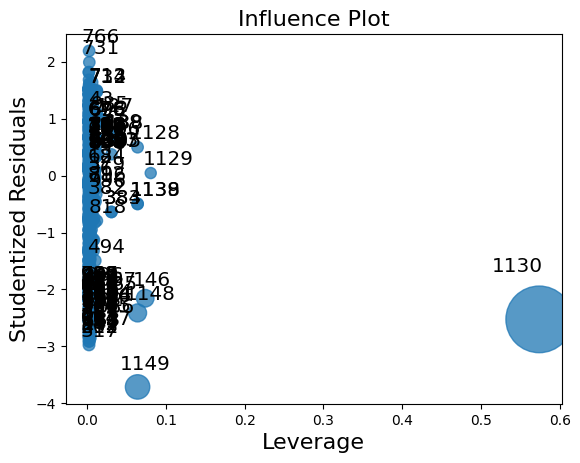

In [108]:
#Creacion de influence plot
fig = sm.graphics.influence_plot(model, criterion="cooks")